In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# to retrieve calibration tools, refer to https://docs.nvidia.com/vpi/sample_fisheye.html

# Fisheye coefficients: [ 0.25395133 -0.49940608  0.47873399 -0.16246665]
# Camera matrix:
# [[166.83989197   0.         313.73946937]
#  [  0.         226.20299049 218.50950474]
#  [  0.           0.           1.        ]]

# NEW CALIBRATIONS
# Fisheye coefficients: [-0.12231169  0.23412349 -2.6743625   4.00365365]
# Camera matrix:
# [[245.70256095   0.         411.11971609]
#  [  0.         248.03563256 308.33428535]
#  [  0.           0.           1.        ]]

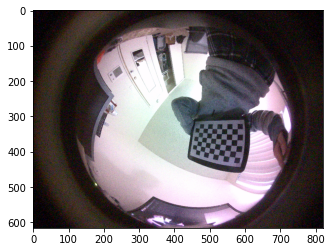

In [ ]:
img_path = "./content/18.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
# camera_matrix = np.array([
#     [166.83989197, 0, 313.73946937],
#     [0, 226.20299049, 218.50950474],
#     [0, 0, 1]
# ])

# k = np.array([0.25395133, -0.4994060, 0.47873399, -0.16246665])

# set camera matrix and k
camera_matrix = np.array([
    [245.70256095, 0, 411.11971609],
    [  0, 248.03563256, 308.33428535],
    [  0, 0, 1]
 ])

k = np.array([-0.12231169, 0.23412349, -2.6743625, 4.00365365])

In [ ]:
import time

def theta2xyz(theta, phi):
    X = np.sin(theta) * np.cos(phi)
    Z = np.sin(phi)
    Y = np.cos(theta) * np.cos(phi)

    return X, Y, Z

# set these for output
w, h = 640, 900
new_img = np.zeros((h, w, 3), dtype=np.int32)

thetarange = np.linspace(-np.pi,np.pi,w,endpoint=False)
phirange = np.linspace(np.pi/2,-np.pi/2,h,endpoint=True)

phi,theta = np.meshgrid(phirange,thetarange,indexing='ij')

X,Y,Z = theta2xyz(theta,phi)
XYZ = np.stack([X.flatten(),Y.flatten(),Z.flatten()],axis=-1)
xyd, _ = cv2.fisheye.projectPoints(XYZ[:,None,:], (0,0,0), (0,0,0), camera_matrix, k)
xyd = xyd[:,0,:]
xyd = np.reshape(xyd,(h,w,2)).astype('float32')[:256,:,:] # limit the size

np.save("map.npy", xyd)

start = time.time()
new_img = cv2.remap(img,xyd,None,cv2.INTER_LINEAR)
print(time.time() - start)

0.002809762954711914


True

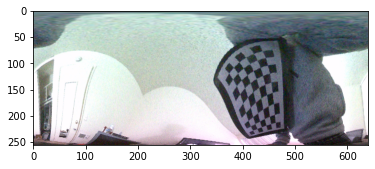

In [ ]:
plt.imshow(new_img)
new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
cv2.imwrite("fisheye_large_conversion.png", new_img)